In [99]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [100]:
def s1(y):
  """Transform onto s1"""
  s1_y = []
  for val in y:
    v = val % (2*np.pi)
    if v > np.pi:
      v = v - 2*np.pi
    s1_y.append(v)
  return s1_y

In [101]:
def deriv(t, y, L1, L2, m1, m2, g):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    theta1, z1, theta2, z2 = y

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return theta1dot, z1dot, theta2dot, z2dot

In [102]:
def pi_jumps(y):
  """Return list of places where line between i -> i+1 should be removed."""
  no_line = []
  a = (y + np.pi) // (2*np.pi) / np.pi
  for i in range(len(a)-1):
    if a[i] != a[i+1]:
      no_line.append(i)
  return no_line

In [103]:
def plot_minus_jumps(y1, y2):
  index = [i for i in range(len(y1)-1, -1, -1)]
  discont  = set(pi_jumps(y1) + pi_jumps(y2))
  s_y1 = s1(y1)
  s_y2 = s1(y2)
  discont = list(discont)
  discont.sort()
  separated_points = []
  while index:
    run = [[], []]
    while True:
      j = index.pop()
      run[0].append(s_y1[j])
      run[1].append(s_y2[j])
      if j in discont or j == len(y1)-1:
        separated_points.append(run)
        break
  for r in range(len(separated_points)):
    plt.plot(separated_points[r][0], separated_points[r][1], color = 'b')

In [104]:
def lin_deriv(t, y, l1, l2, m1, m2, g):
    P = np.array([[(m1+m2)*l1**2, m2*l1*l2], [m2*l1*l2, m2*l2**2]])
    Q = - np.array([[(m1+m2)*g*l1, 0], [0, m2*g*l2]])
    A = np.matmul(np.linalg.inv(P), Q)
    C = np.block([[np.zeros([2, 2]), np.identity(2)], [A, np.zeros([2, 2])]])
    return np.matmul(C, np.array(y).T)

In [105]:
args = [1, 1, 1, 1, 9.81]
y0 = np.array([np.pi/3, 0, np.pi/3, np.pi/2])
y = solve_ivp(deriv, (0, 20), y0, args=args)

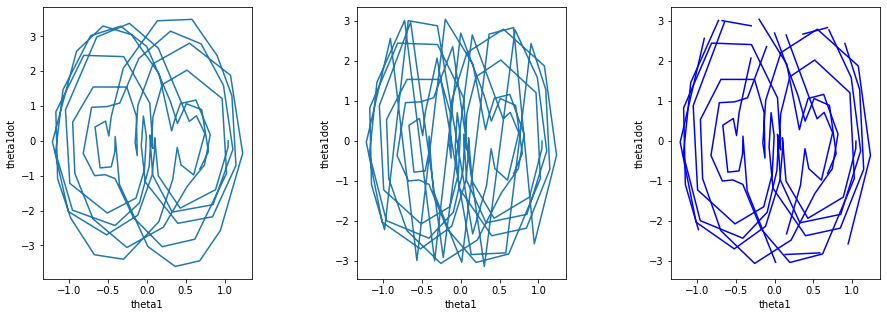

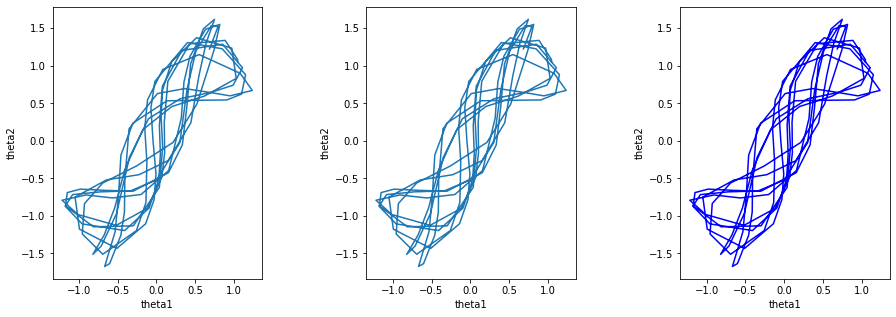

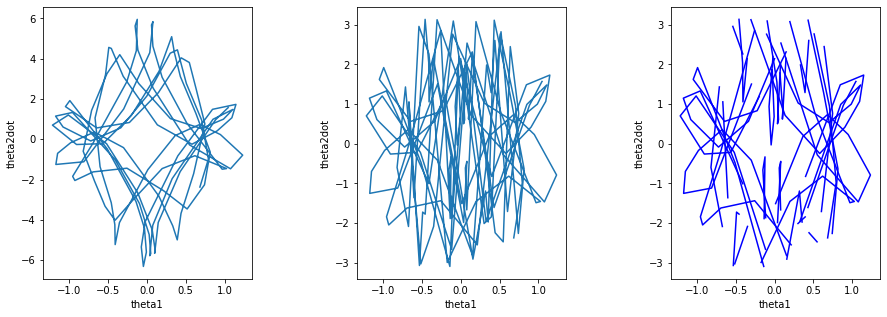

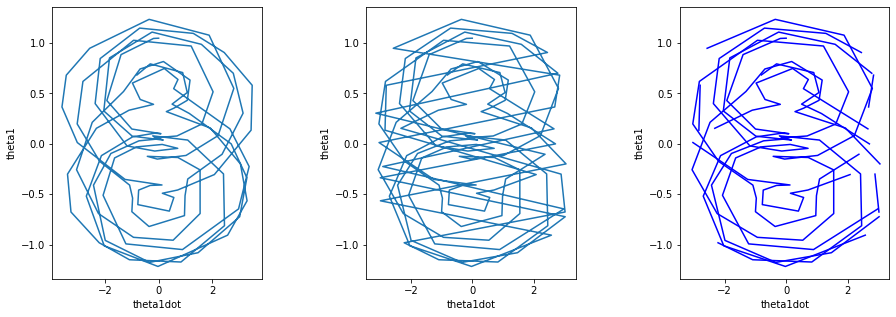

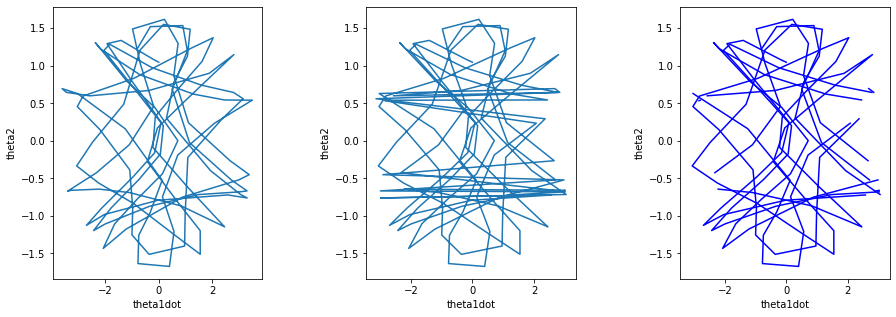

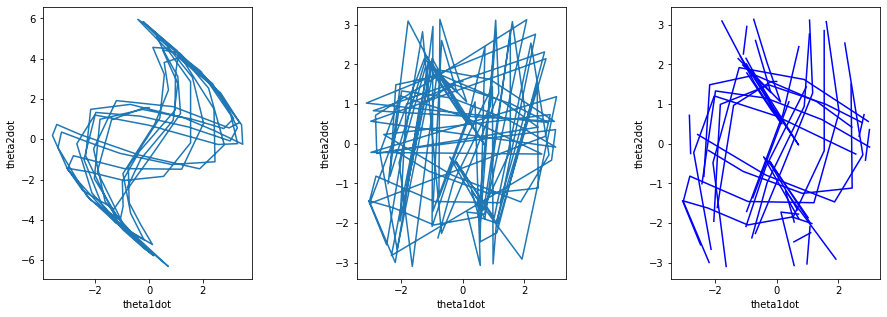

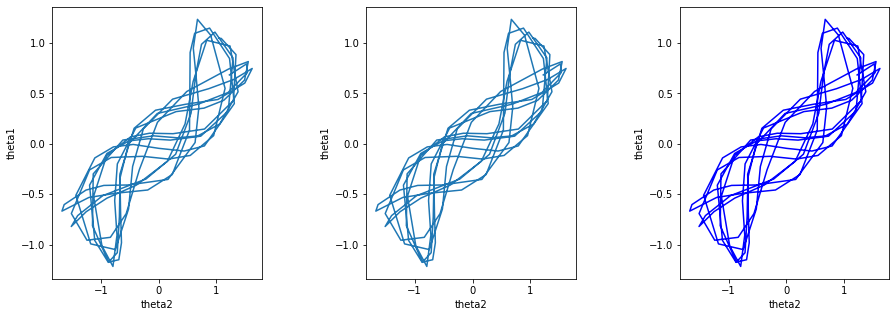

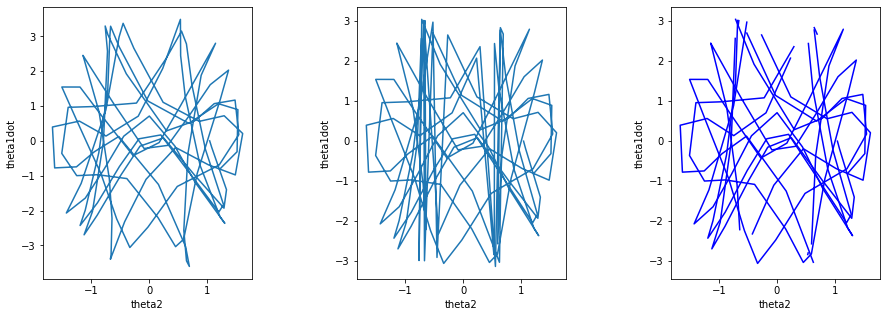

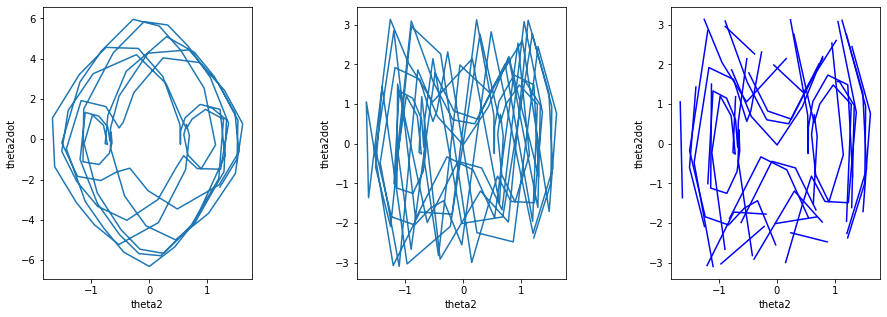

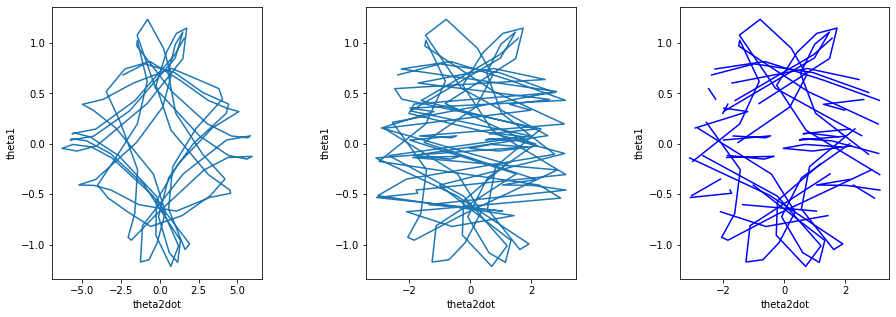

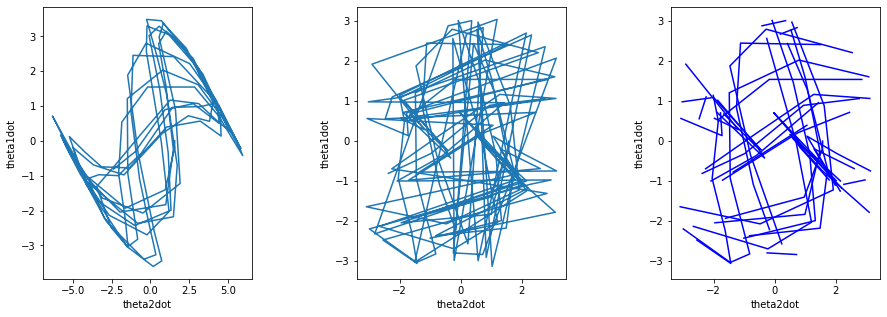

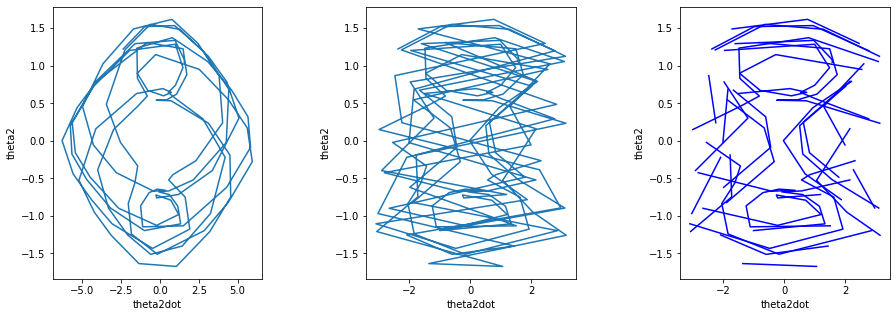

In [106]:
label = ['theta1', 'theta1dot', 'theta2', 'theta2dot']

for i in range(4):
  for j in range(4):
    if i != j:
      plt.figure(figsize=(15,5))
      a = plt.subplot(1, 3, 1)
      plt.subplots_adjust(wspace=0.5)
      plt.plot(y.y[i], y.y[j])
      plt.xlabel(label[i])
      plt.ylabel(label[j])
      b = plt.subplot(1, 3, 2)
      plt.plot(s1(y.y[i]), s1(y.y[j]))
      plt.xlabel(label[i])
      plt.ylabel(label[j])
      c = plt.subplot(1, 3, 3)
      plot_minus_jumps(y.y[i], y.y[j])
      plt.xlabel(label[i])
      plt.ylabel(label[j])

In [107]:
def compare_phase_portraits(t1, t2, t1d, t2d, *, t_max=10, args=args): 
    y = solve_ivp(deriv, (0, t_max), np.array([t1, t1d, t2, t2d]), args=args)
    lin_y = solve_ivp(lin_deriv, (0, t_max), np.array([t1, t2, t1d, t2d]), args=args)
    
    plt.figure()
    plt.plot(y.t, y.y[0], label='theta1')
    plt.plot(y.t, y.y[2], label='theta2')
    plt.legend(loc="upper left")
    plt.title("Original equations")
    plt.xlabel("Time")
    
    plt.figure()
    plt.plot(lin_y.t, lin_y.y[0], label='theta1')
    plt.plot(lin_y.t, lin_y.y[1], label='theta2')
    plt.title("Linearised equations")
    plt.legend(loc="upper left")
    plt.xlabel("Time")
    
    plt.figure()
    plt.plot(y.t, y.y[0], label='original')
    plt.plot(lin_y.t, lin_y.y[0], label='linearised')
    plt.legend(loc='upper left')
    plt.title("Compare theta1")
    plt.xlabel("Time")

    plt.figure()
    plt.title("Compare theta2")
    plt.xlabel("Time")
    plt.plot(y.t, y.y[2], label="original")
    plt.plot(lin_y.t, lin_y.y[1], label="linearised")
    plt.legend(loc="upper left")

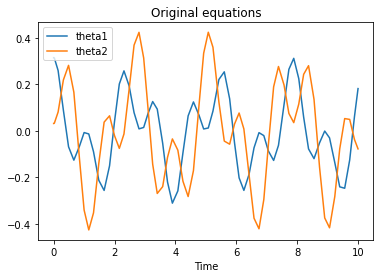

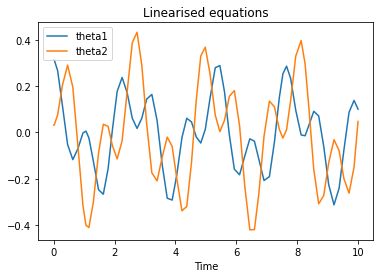

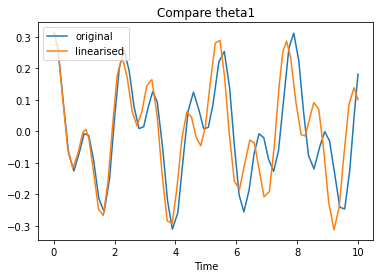

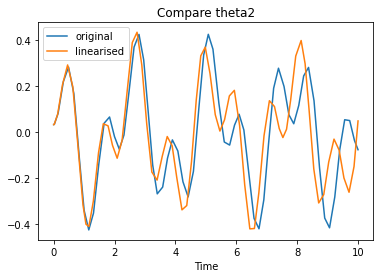

In [108]:
compare_phase_portraits(np.pi/10, np.pi/100, 0, 0)